In [1]:
# Import voxelize
import sys
sys.path.append('/appalachia/d6/yujie/voxelize-master/voxelize')
sys.path.append('/appalachia/d6/yujie/voxelize-master')
import voxelize
from voxelize import Voxelize
Voxelize.__init__(self=Voxelize, use_gpu=False, network_dir=None)

Only the CPU-only flavour of Voxelize is available!


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
# %matplotlib widget
import matplotlib.pyplot as plt
import h5py
import numpy as np

import matplotlib.colors as colors
import seaborn as sns

import utils_data as dt
import utils_pk as pk
import utils_voxelize as vxl
import os

plt.style.use('./niceplot2jay.mplstyle')

Only the CPU-only flavour of Voxelize is available!


## Examine Data

In [2]:
file = '/appalachia/d5/DISK/from_pleiades/snapshots/gmcs0_wind4_gmc9/snapshot_550.hdf5'
pos, mass, rho, v = dt.PrepSnapshot(file)
v_grid, m_grid = vxl.VoxelizeInterpolate(pos, mass, rho, v, Lbox=1., Nsize=128, smoothing_rate=2.)
V = mass / rho
R = ((3*V)/(4*np.pi))**(1/3) # To check radius distribution

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
root_add_process : started ...
workers_process : started ...
workers using 35 threads.
Workers processed 81272994 numbers, of which were
	0.000e+00 exact calculations (R<Rmin),
	7.485e+07 exact calculations (R>Rmax),
	6.422e+06 trivial calculations,
	0.000e+00 interpolations.

workers_process : ended.
Root processed 81272994 numbers in 2498 CPU-chunks.
root_add_process : ended.
voxelize_gpu function took 14.8094 seconds
In the end, 0 in cpu_queue


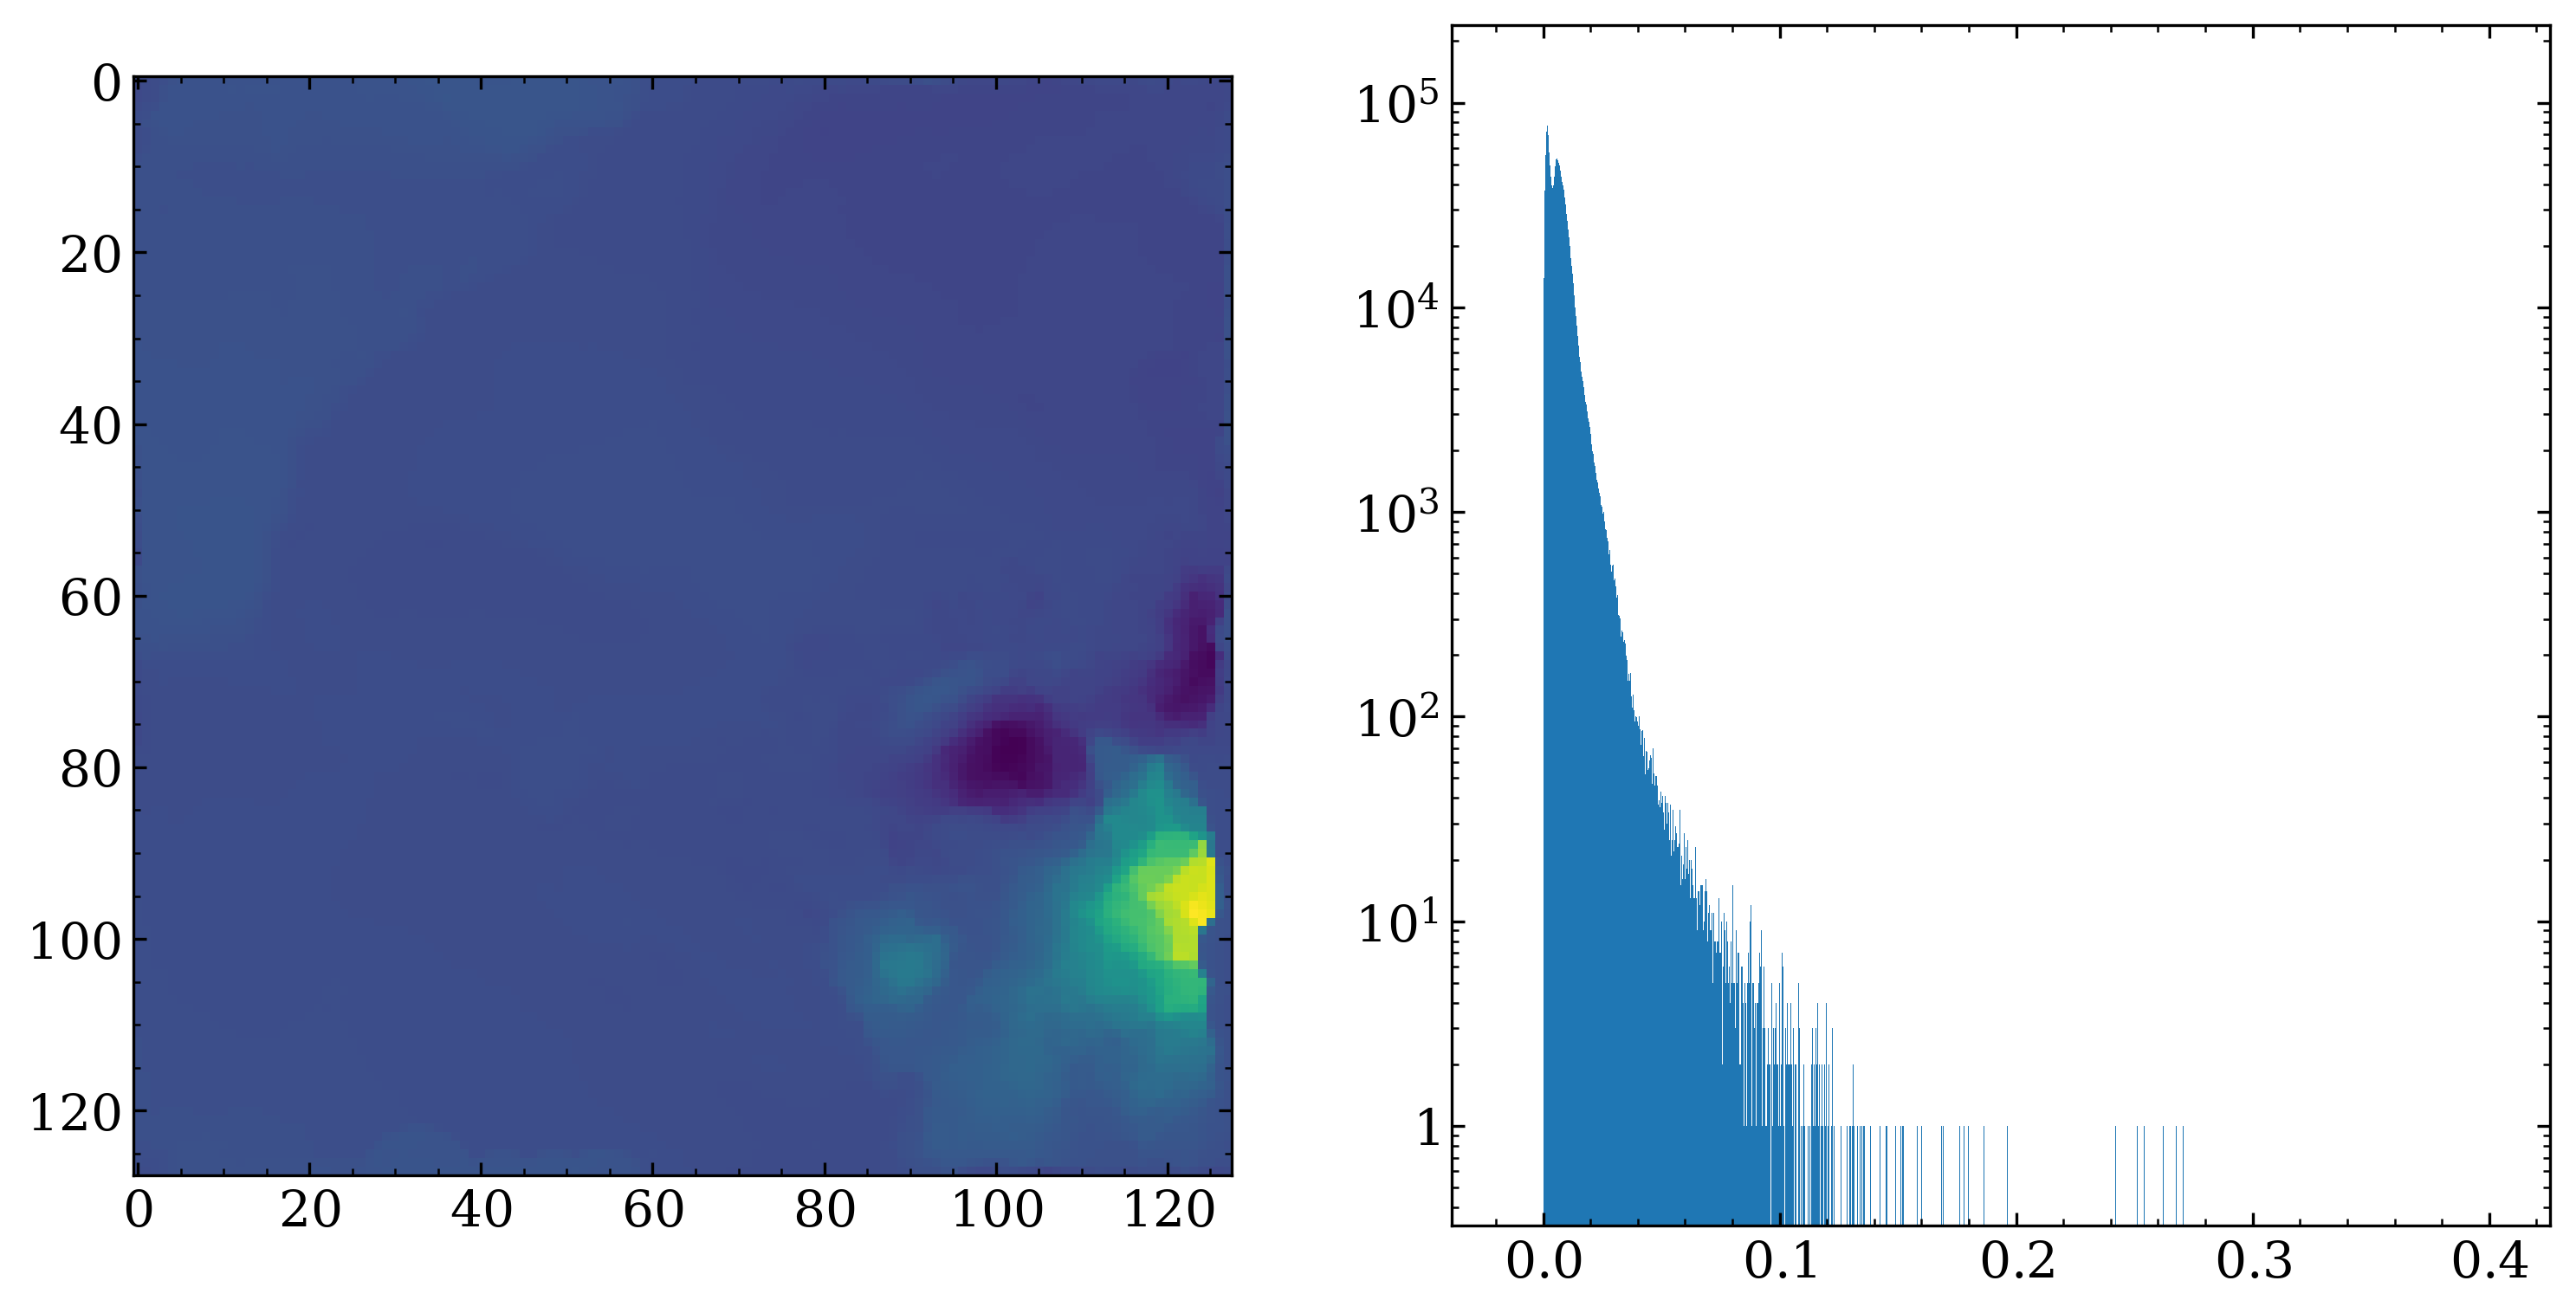

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(v_grid[:,:,30,0])
axes[1].hist(R*2, log=True) # h = R * smoothing_rate
plt.show()

Final run

In [4]:
file = '/appalachia/d5/DISK/from_pleiades/snapshots/gmcs0_wind4_gmc9/snapshot_550.hdf5'
pos, mass, rho, v = dt.PrepSnapshot(file)
data_folder = vxl.InterpBlocksVelocity(pos, mass, rho, v, 
  Lbox=1., Nblock=4, Nsize_blk=64, margin=10/64, 
  smoothing_rate=2., scheme='voxelize', output_folder='./output')

Block length: 0.328125 Block Nsize: 84


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
root_add_process : started ...
workers_process : started ...
workers using 35 threads.
Workers processed 9151222 numbers, of which were
	0.000e+00 exact calculations (R<Rmin),
	7.798e+06 exact calculations (R>Rmax),
	1.354e+06 trivial calculations,
	0.000e+00 interpolations.

workers_process : ended.
Root processed 9151222 numbers in 295 CPU-chunks.
root_add_process : ended.
voxelize_gpu function took 2.4523 seconds
In the end, 0 in cpu_queue
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
root_add_process : started ...
workers_process : started ...
workers using 35 threads.
Workers processed 10328340 numbers, of which were
	0.000e+00 exact calculations (R<Rmin),
	8.954e+06 exact calculations (R>Rmax),
	1.374e+06 trivial calculations,
	0.000e+00 interpolations.

workers_process : ended.
Root processed 10328340 numbers in 334 CPU-chunks.
root_

Examine result

Plot blocks

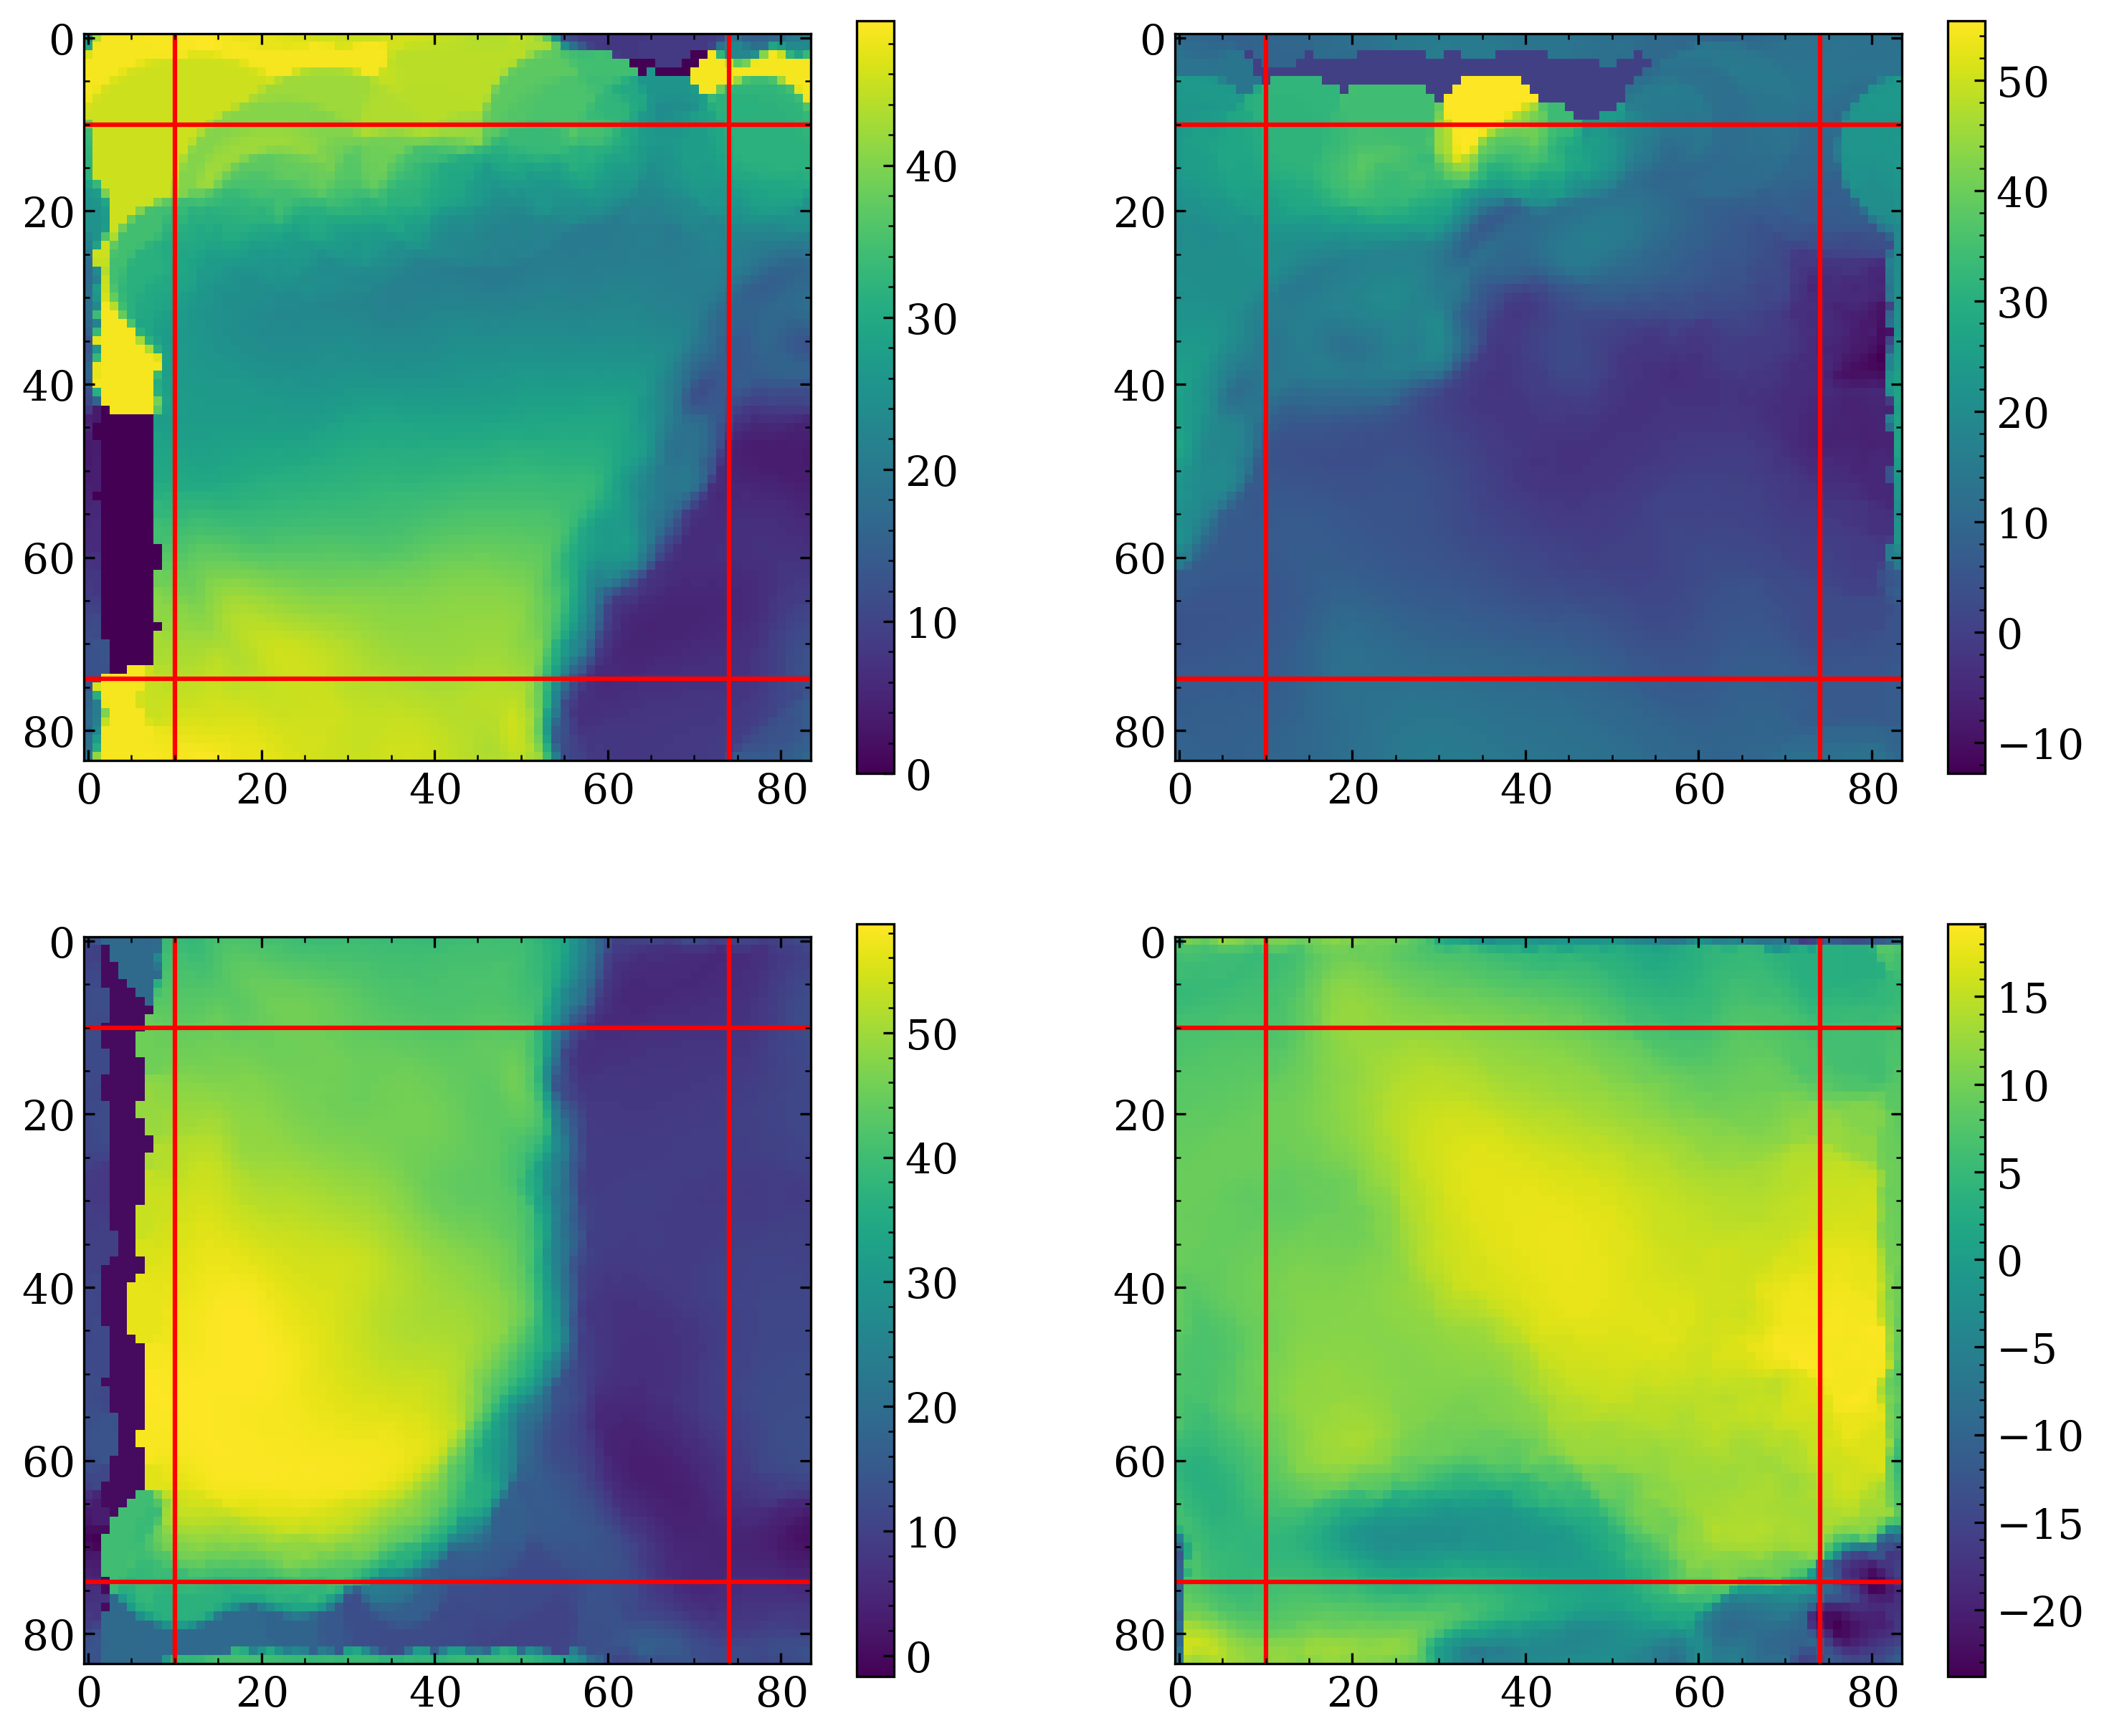

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

file = 'output/Ng256Nb64Nmargin10/r0s0t0.npy'
v_block = np.load(file)
im = axes[0, 0].imshow(v_block[:,:,40,0])
plt.colorbar(im, ax=axes[0, 0])
axes[0, 0].axhline(10, color='r')
axes[0, 0].axhline(74, color='r')
axes[0, 0].axvline(10, color='r')
axes[0, 0].axvline(74, color='r')

file = 'output/Ng256Nb64Nmargin10/r1s0t0.npy'
v_block = np.load(file)
im = axes[1, 0].imshow(v_block[:,:,40,0])
plt.colorbar(im, ax=axes[1, 0])
axes[1, 0].axhline(10, color='r')
axes[1, 0].axhline(74, color='r')
axes[1, 0].axvline(10, color='r')
axes[1, 0].axvline(74, color='r')

file = 'output/Ng256Nb64Nmargin10/r0s1t0.npy'
v_block = np.load(file)
im = axes[0, 1].imshow(v_block[:,:,40,0])
plt.colorbar(im, ax=axes[0, 1])
axes[0, 1].axhline(10, color='r')
axes[0, 1].axhline(74, color='r')
axes[0, 1].axvline(10, color='r')
axes[0, 1].axvline(74, color='r')

file = 'output/Ng256Nb64Nmargin10/r1s1t0.npy'
v_block = np.load(file)
im = axes[1, 1].imshow(v_block[:,:,40,0])
plt.colorbar(im, ax=axes[1, 1])
axes[1, 1].axhline(10, color='r')
axes[1, 1].axhline(74, color='r')
axes[1, 1].axvline(10, color='r')
axes[1, 1].axvline(74, color='r')

plt.show()



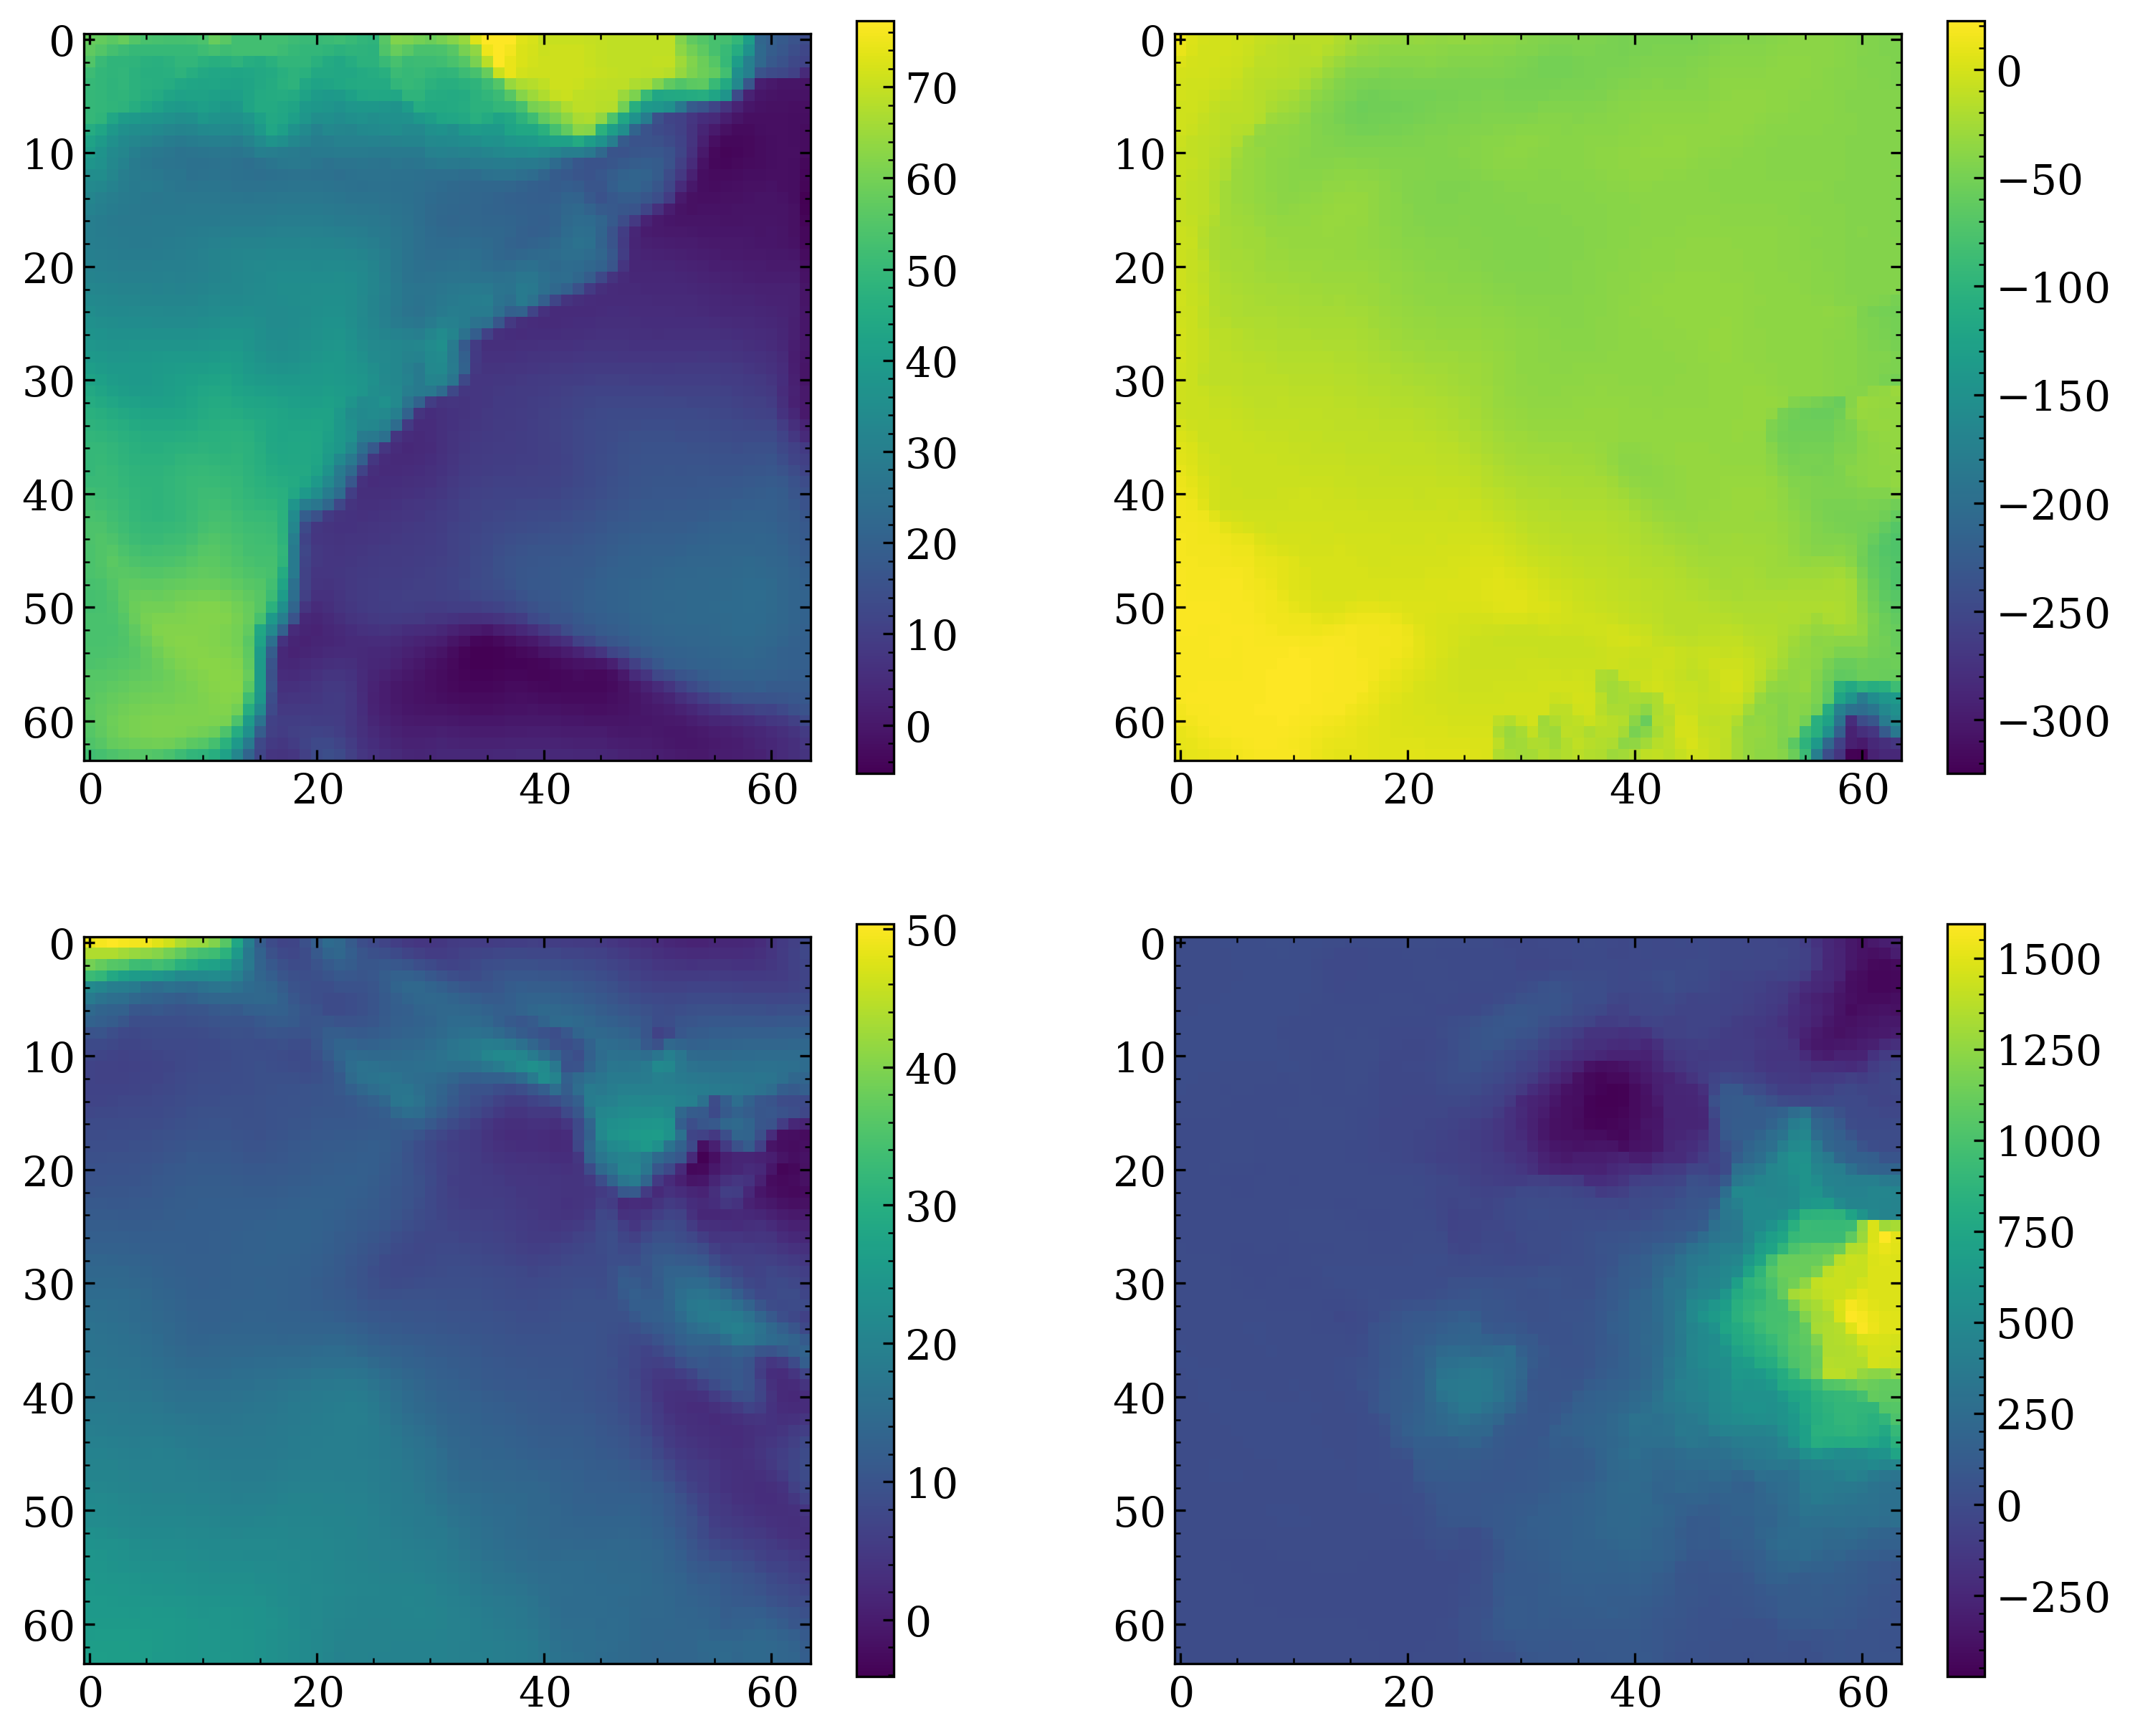

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

file = 'output/Ng128Nb64Nmargin10/r0s0t0.npy'
v_block = np.load(file)
im = axes[0, 0].imshow(v_block[10:-10,10:-10,40,0])
plt.colorbar(im, ax=axes[0, 0])
file = 'output/Ng128Nb64Nmargin10/r1s0t0.npy'
v_block = np.load(file)
im = axes[1, 0].imshow(v_block[10:-10,10:-10,40,0])
plt.colorbar(im, ax=axes[1, 0])
file = 'output/Ng128Nb64Nmargin10/r0s1t0.npy'
v_block = np.load(file)
im = axes[0, 1].imshow(v_block[10:-10,10:-10,40,0])
plt.colorbar(im, ax=axes[0, 1])
file = 'output/Ng128Nb64Nmargin10/r1s1t0.npy'
v_block = np.load(file)
im = axes[1, 1].imshow(v_block[10:-10,10:-10,40,0])
plt.colorbar(im, ax=axes[1, 1])
plt.show()


In [5]:
file = '/appalachia/d5/DISK/from_pleiades/snapshots/gmcs0_wind4_gmc9/snapshot_550.hdf5'
pos, mass, rho, v = dt.LoadSnapshot(file)
v_grid, m_grid = vxl.VoxelizeInterpolate(pos, mass, rho, v, Lbox=1., Nsize=128, smoothing_rate=2.)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
root_add_process : started ...
workers_process : started ...
workers using 35 threads.
Workers processed 81272994 numbers, of which were
	0.000e+00 exact calculations (R<Rmin),
	7.485e+07 exact calculations (R>Rmax),
	6.422e+06 trivial calculations,
	0.000e+00 interpolations.

workers_process : ended.
Root processed 81272994 numbers in 2499 CPU-chunks.
root_add_process : ended.
voxelize_gpu function took 10.9900 seconds
In the end, 0 in cpu_queue


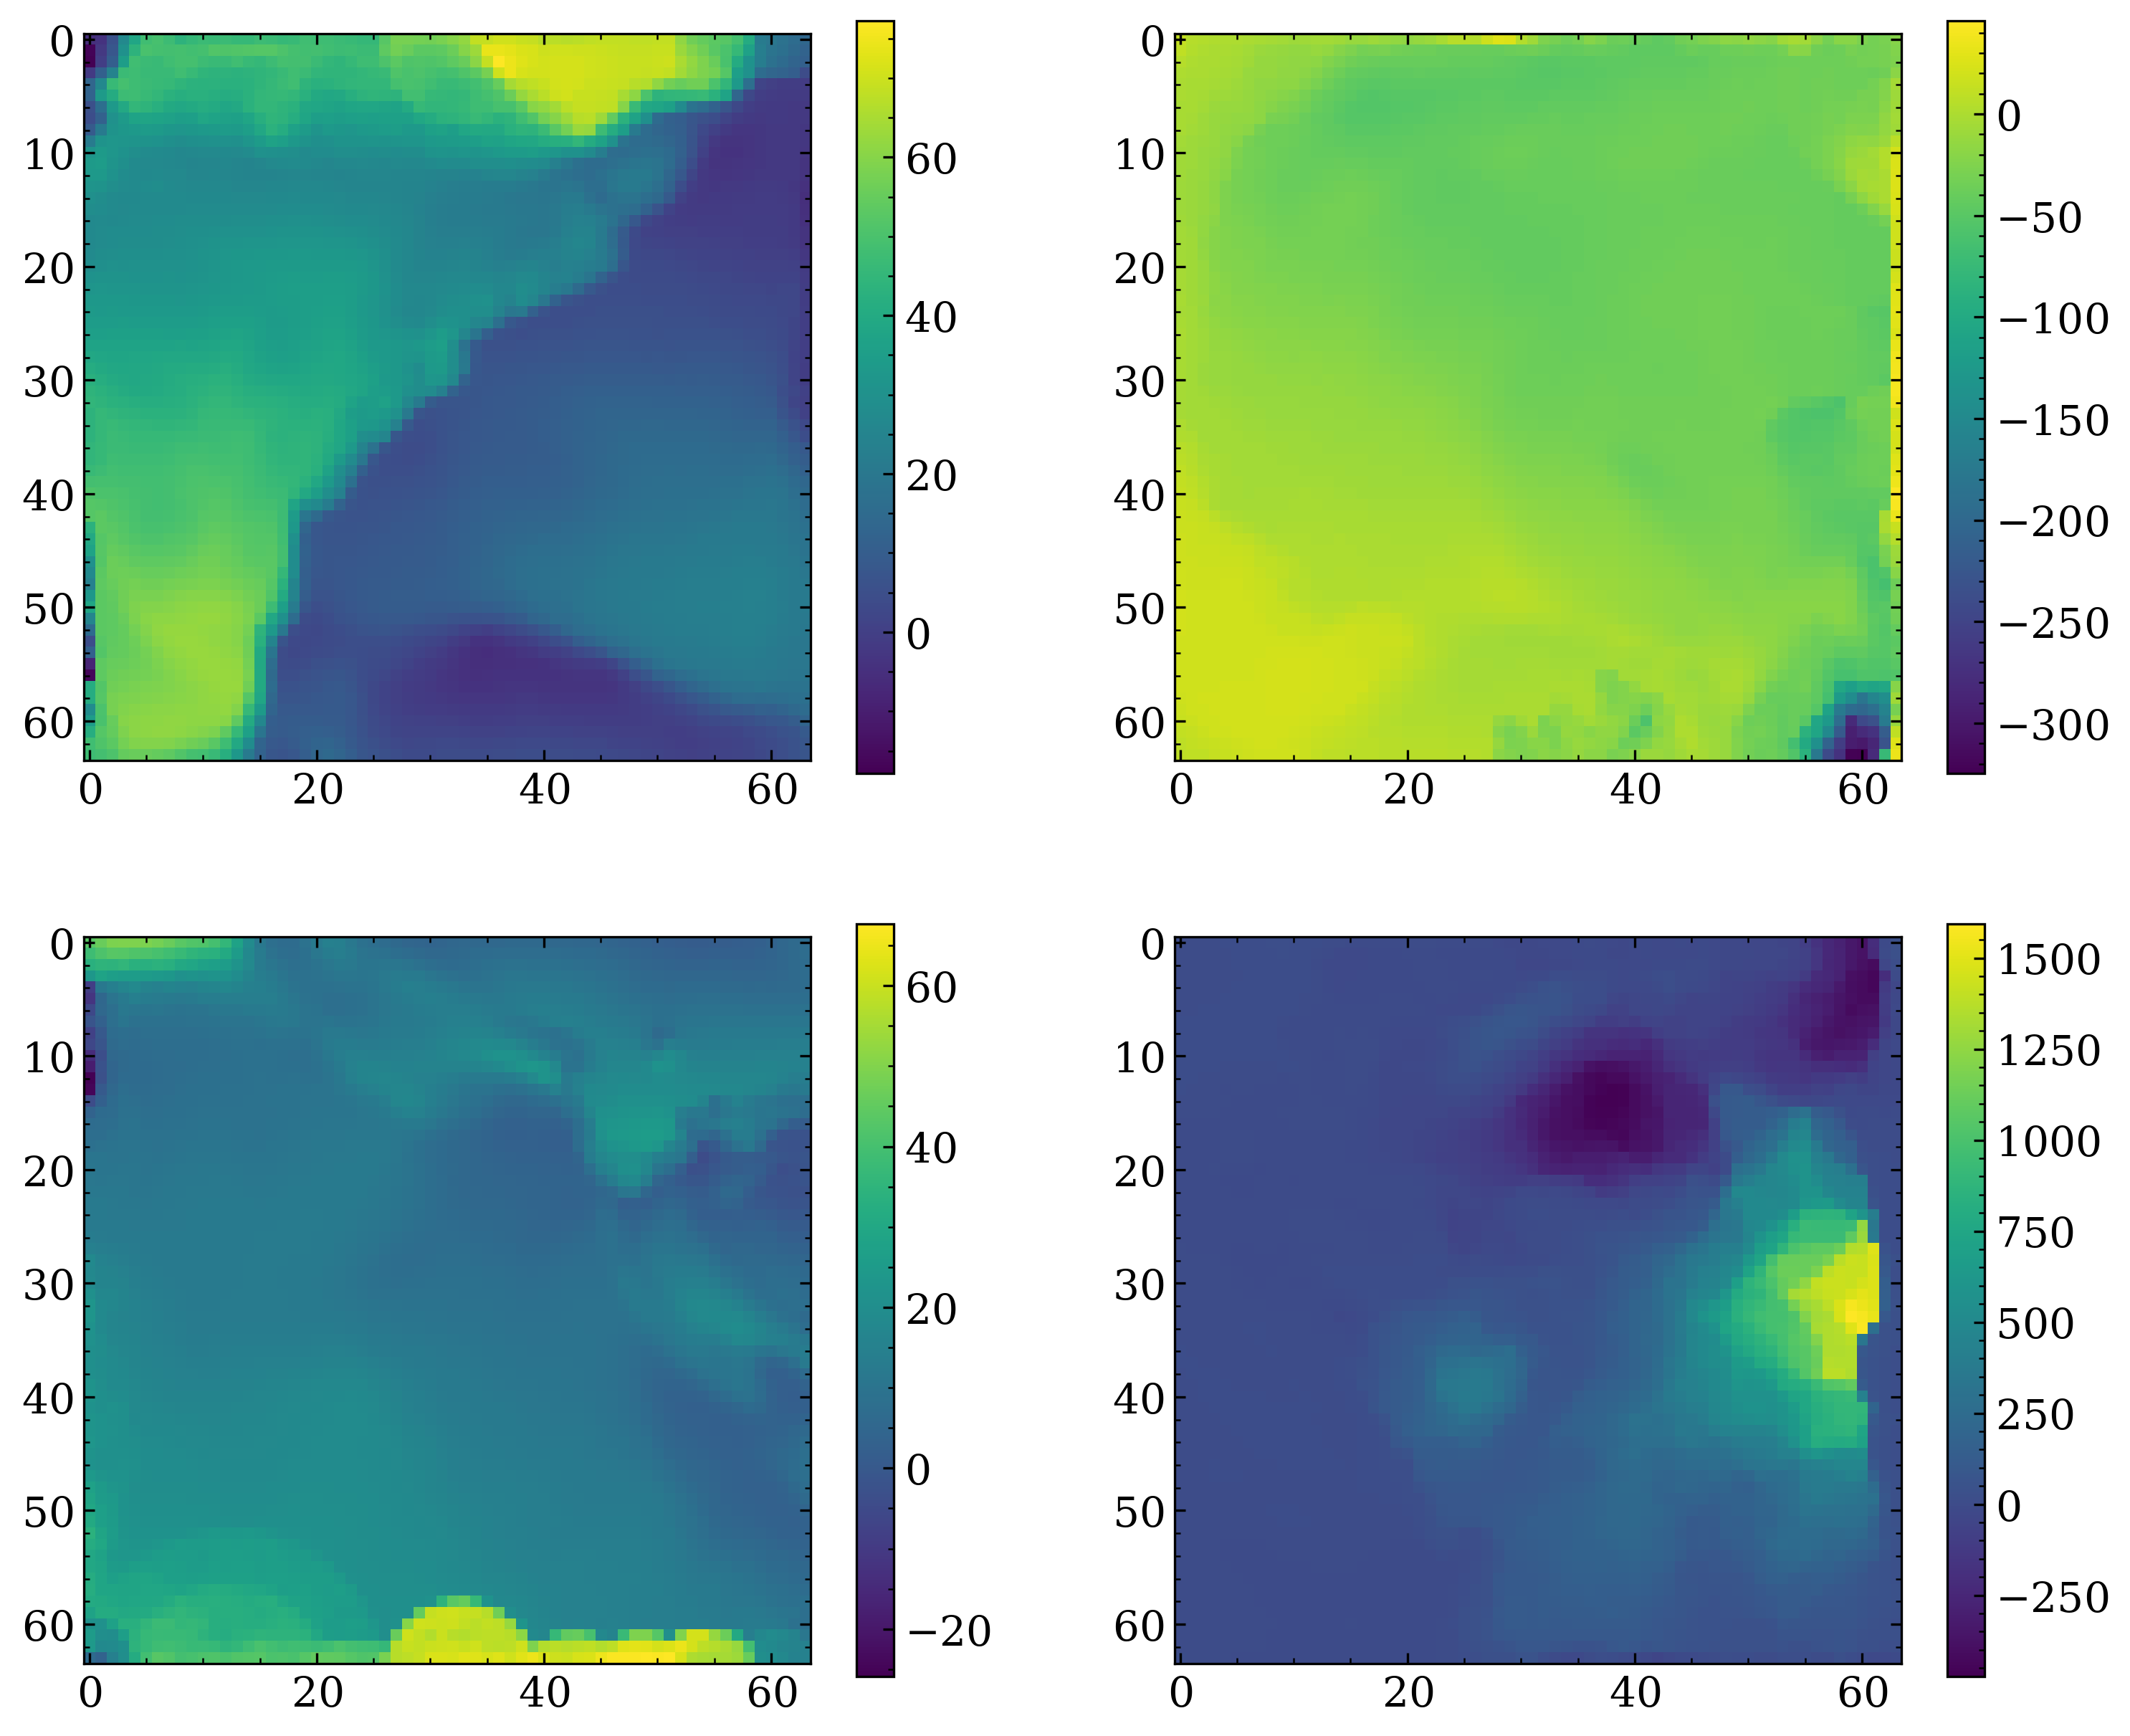

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

im = axes[0, 0].imshow(v_grid[:64,:64,30,0])
plt.colorbar(im, ax=axes[0, 0])
im = axes[1, 0].imshow(v_grid[64:,:64,30,0])
plt.colorbar(im, ax=axes[1, 0])
im = axes[0, 1].imshow(v_grid[:64,64:,30,0])
plt.colorbar(im, ax=axes[0, 1])
im = axes[1, 1].imshow(v_grid[64:,64:,30,0])
plt.colorbar(im, ax=axes[1, 1])
plt.show()

90.9%
83.3%
90.8%
87.3%


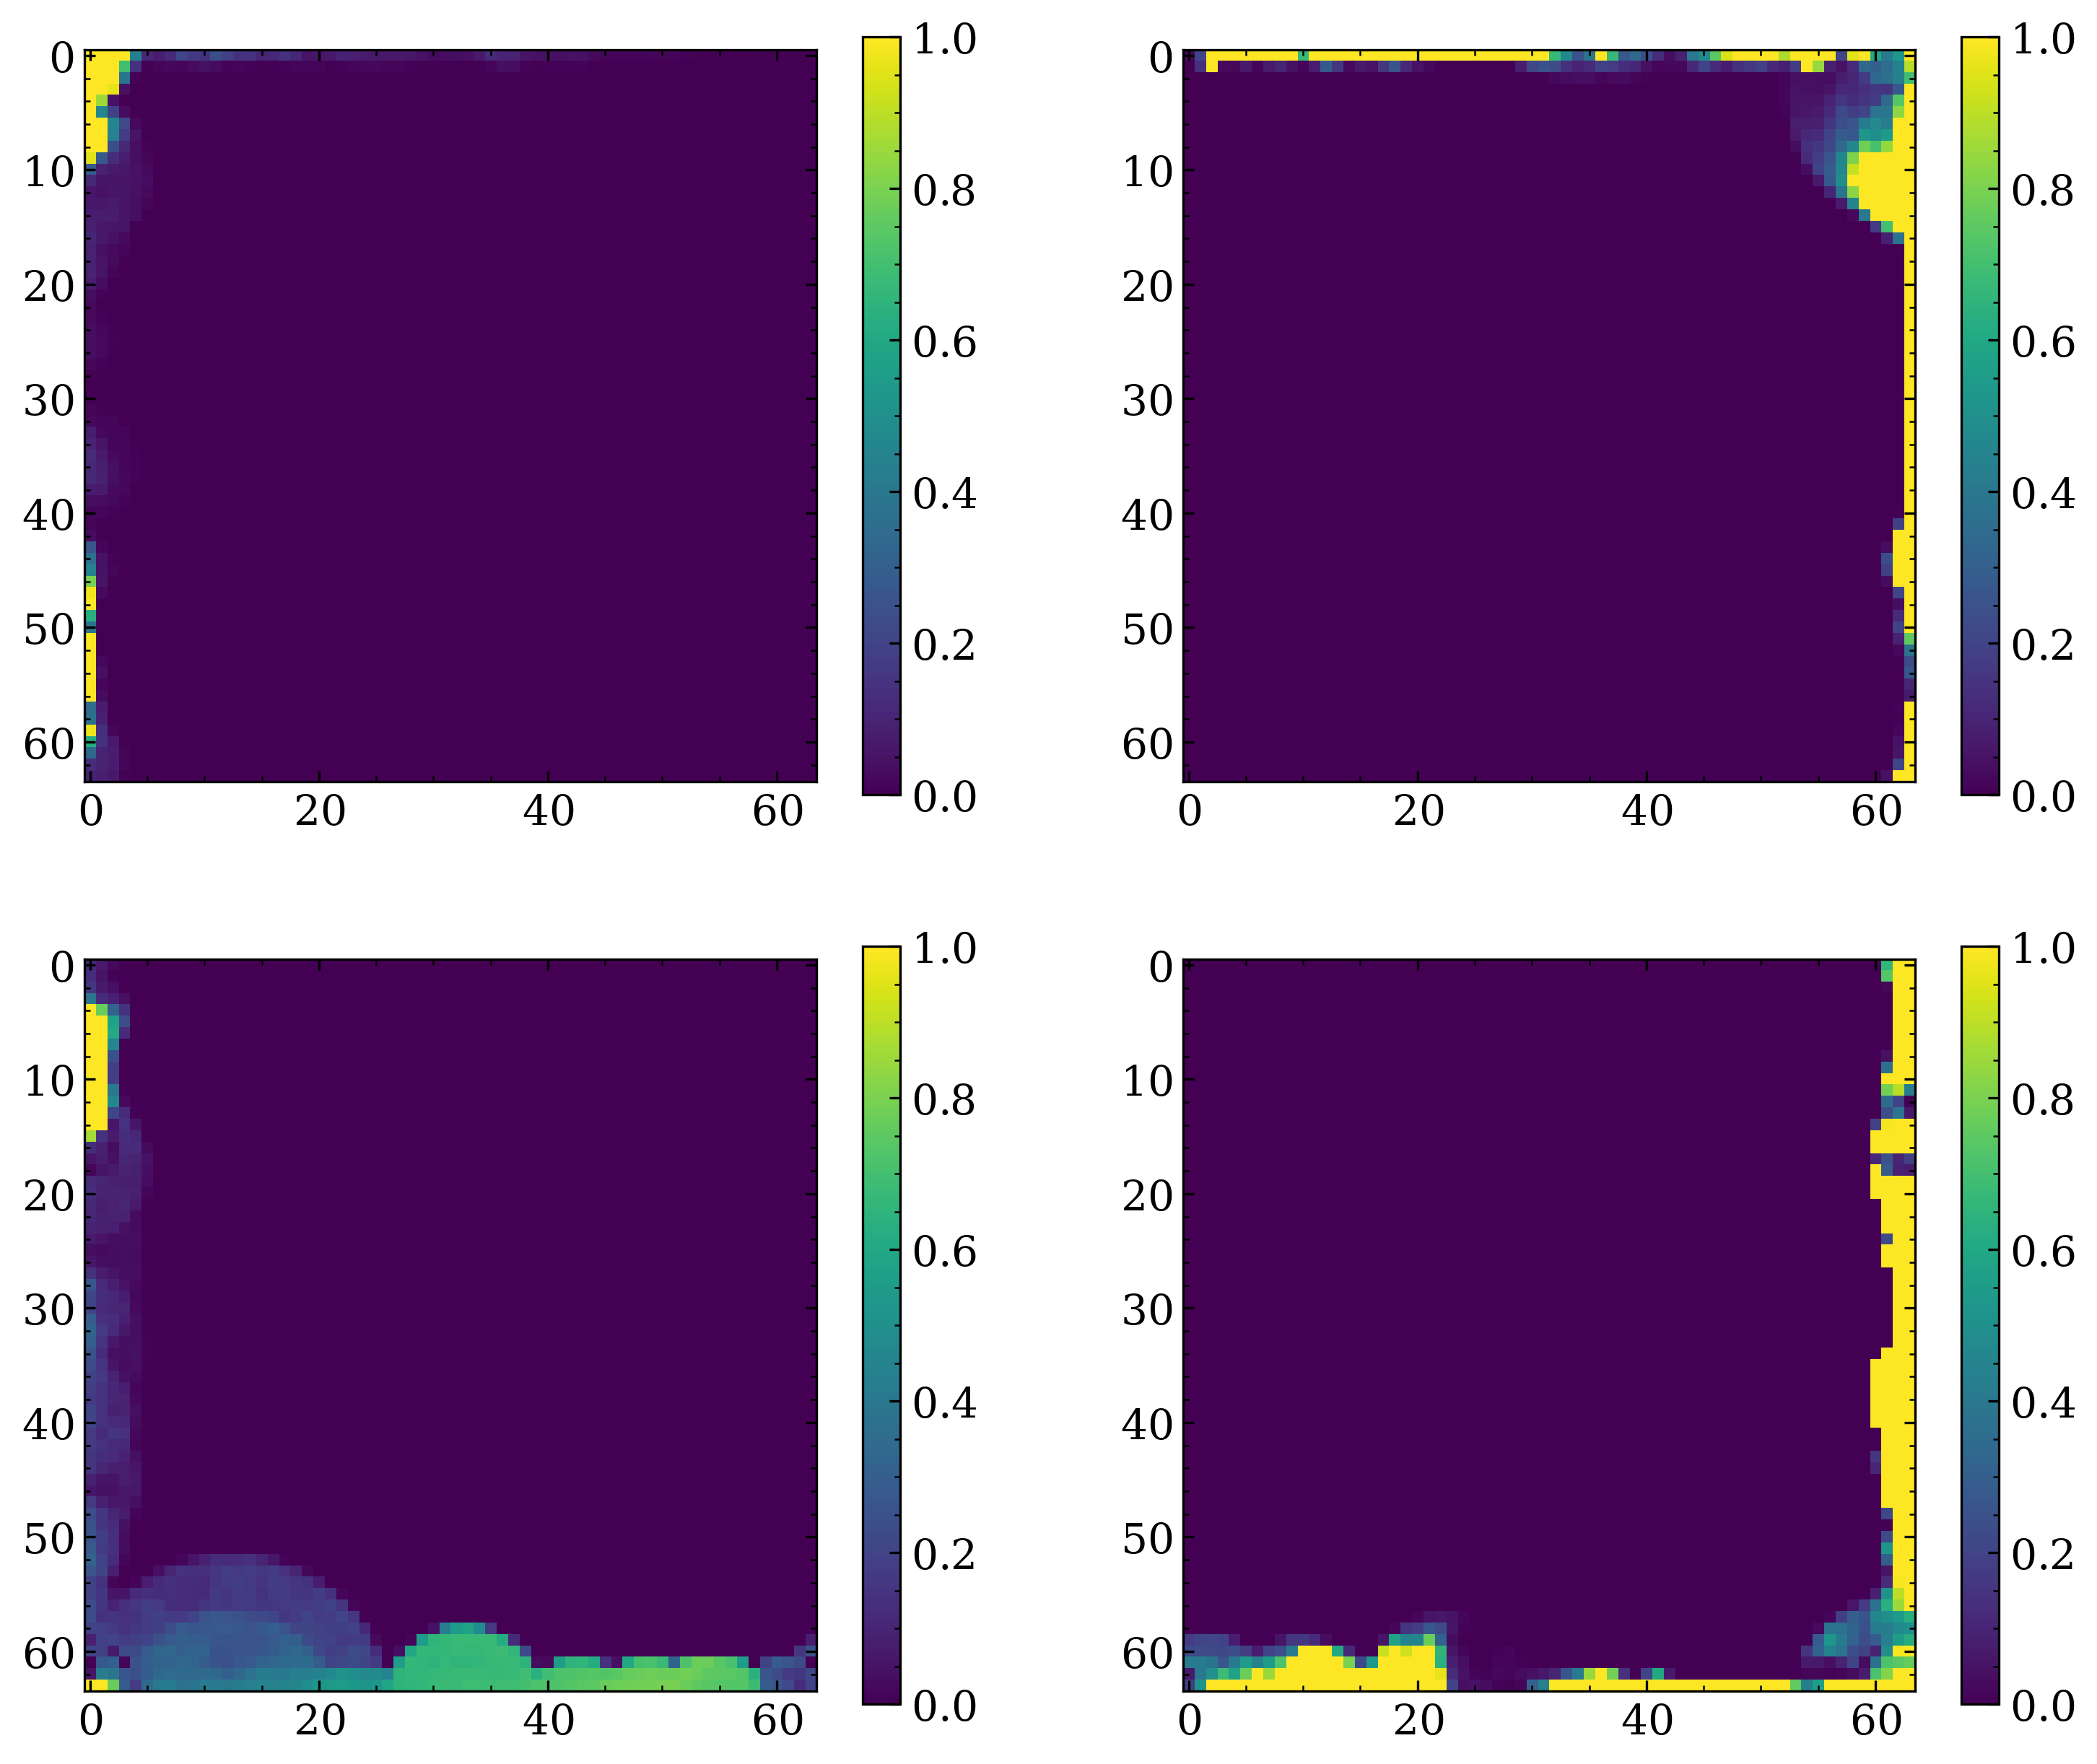

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# current_cmap = plt.get_cmap().copy()
# current_cmap.set_bad(color='red')

file = 'output/Ng128Nb64Nmargin10/r0s0t0.npy'
v_block = np.load(file)
block = v_block[10:-10,10:-10,40,0]
grid = v_grid[:64,:64,30,0]
comparison = np.abs((block - grid) / grid)
# comparison[comparison == 0] = np.nan
print('{:.1%}'.format(len(comparison[comparison <= 1e-5])/64**2))
im = axes[0, 0].imshow(comparison, vmin=0, vmax=1)
plt.colorbar(im, ax=axes[0, 0])

file = 'output/Ng128Nb64Nmargin10/r1s0t0.npy'
v_block = np.load(file)
block = v_block[10:-10,10:-10,40,0]
grid = v_grid[64:,:64,30,0]
comparison = np.abs((block - grid) / grid)
# comparison[comparison == 0] = np.nan
print('{:.1%}'.format(len(comparison[comparison <= 1e-5])/64**2))
im = axes[1, 0].imshow(comparison, vmin=0, vmax=1)
plt.colorbar(im, ax=axes[1, 0])

file = 'output/Ng128Nb64Nmargin10/r0s1t0.npy'
v_block = np.load(file)
block = v_block[10:-10,10:-10,40,0]
grid = v_grid[:64,64:,30,0]
comparison = np.abs((block - grid) / grid)
# comparison[comparison == 0] = np.nan
print('{:.1%}'.format(len(comparison[comparison <= 1e-5])/64**2))
im = axes[0, 1].imshow(comparison, vmin=0, vmax=1)
plt.colorbar(im, ax=axes[0, 1])


file = 'output/Ng128Nb64Nmargin10/r1s1t0.npy'
v_block = np.load(file)
block = v_block[10:-10,10:-10,40,0]
grid = v_grid[64:,64:,30,0]
comparison = np.abs((block - grid) / grid)
# comparison[comparison == 0] = np.nan
print('{:.1%}'.format(len(comparison[comparison <= 1e-5])/64**2))
im = axes[1, 1].imshow(comparison, vmin=0, vmax=1)
plt.colorbar(im, ax=axes[1, 1])

plt.show()

### Debug
line by line

In [24]:
smoothing_rate = 2.
Lbox = 1.
Nblock = 2
Nsize_blk = 64
margin = 10/64
scheme='voxelize'
file = '/appalachia/d5/DISK/from_pleiades/snapshots/gmcs0_wind4_gmc9/snapshot_550.hdf5'
pos, mass, rho, v = dt.PrepSnapshot(file)

# kny = 2*np.pi/Lbox
# k_kny_max = Nsize_blk * Nblock
Lbox_blk = Lbox / Nblock
Lbox_mgn = margin * Lbox_blk       # margin box length (margin box length)
Lbox_ext = Lbox_blk + 2 * Lbox_mgn
Nsize_mgn = int(margin * Nsize_blk)
Nsize_ext = Nsize_blk + 2 * Nsize_mgn
print('Sub-box length: {} Sub-box Nsize: {}'.format(Lbox_ext, Nsize_ext))

Sub-box length: 0.65625 Sub-box Nsize: 84


In [4]:
print(pos[:,0].min(), pos[:,0].max())
print(pos[:,1].min(), pos[:,1].max())
print(pos[:,2].min(), pos[:,2].max())

0.0 0.9999977348045945
0.0 0.9999997896774175
0.0 0.9999979620489512


In [25]:
for r in range(Nblock): # 0, 1, 2, ..., Nblock-1
  for s in range(Nblock):  # Nblock*Lbox_blk=Lbox
    for t in range(Nblock):
      selection = (pos[:,0] >= r*Lbox_blk - Lbox_mgn) &\
        (pos[:,0] < (r+1)*Lbox_blk + Lbox_mgn) &\
        (pos[:,1] >= s*Lbox_blk - Lbox_mgn) &\
        (pos[:,1] < (s+1)*Lbox_blk + Lbox_mgn) &\
        (pos[:,2] >= t*Lbox_blk - Lbox_mgn) &\
        (pos[:,2] < (t+1)*Lbox_blk + Lbox_mgn)
      
      pos_blk =  pos[selection]
      rho_blk =  rho[selection]
      m_blk   = mass[selection]
      v_blk   =    v[selection]
      
      if scheme == 'voxelize':
        v_grid, m_grid = vxl.VoxelizeInterpolate(pos_blk, m_blk, rho_blk, v_blk, 
          Lbox=Lbox_ext, Nsize=Nsize_ext, smoothing_rate=smoothing_rate)
        m_grid = np.concatenate((m_grid[-Nsize_mgn:,:,:], m_grid[:-Nsize_mgn,:,:]), axis=0) # Shuffle to real
        m_grid = np.concatenate((m_grid[:,-Nsize_mgn:,:], m_grid[:,:-Nsize_mgn,:]), axis=1)
        m_grid = np.concatenate((m_grid[:,:,-Nsize_mgn:], m_grid[:,:,:-Nsize_mgn]), axis=2)
        v_grid = np.concatenate((v_grid[-Nsize_mgn:,:,:,:], v_grid[:-Nsize_mgn,:,:,:]), axis=0)
        v_grid = np.concatenate((v_grid[:,-Nsize_mgn:,:,:], v_grid[:,:-Nsize_mgn,:,:]), axis=1)
        v_grid = np.concatenate((v_grid[:,:,-Nsize_mgn:,:], v_grid[:,:,:-Nsize_mgn,:]), axis=2)
      else:
        raise Exception("Interpolation scheme unrecognized.")
      break # test run
    break
  break

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
root_add_process : started ...
workers_process : started ...
workers using 35 threads.
Workers processed 19588475 numbers, of which were
	0.000e+00 exact calculations (R<Rmin),
	1.860e+07 exact calculations (R>Rmax),
	9.903e+05 trivial calculations,
	0.000e+00 interpolations.

workers_process : ended.
Root processed 19588475 numbers in 621 CPU-chunks.
root_add_process : ended.
voxelize_gpu function took 2.5131 seconds
In the end, 0 in cpu_queue


/tmp/ipykernel_799628/338513030.py:2: RuntimeWarning: divide by zero encountered in log10
  fig1 = axes[0].imshow(np.log10(m_grid[:,:,40]))


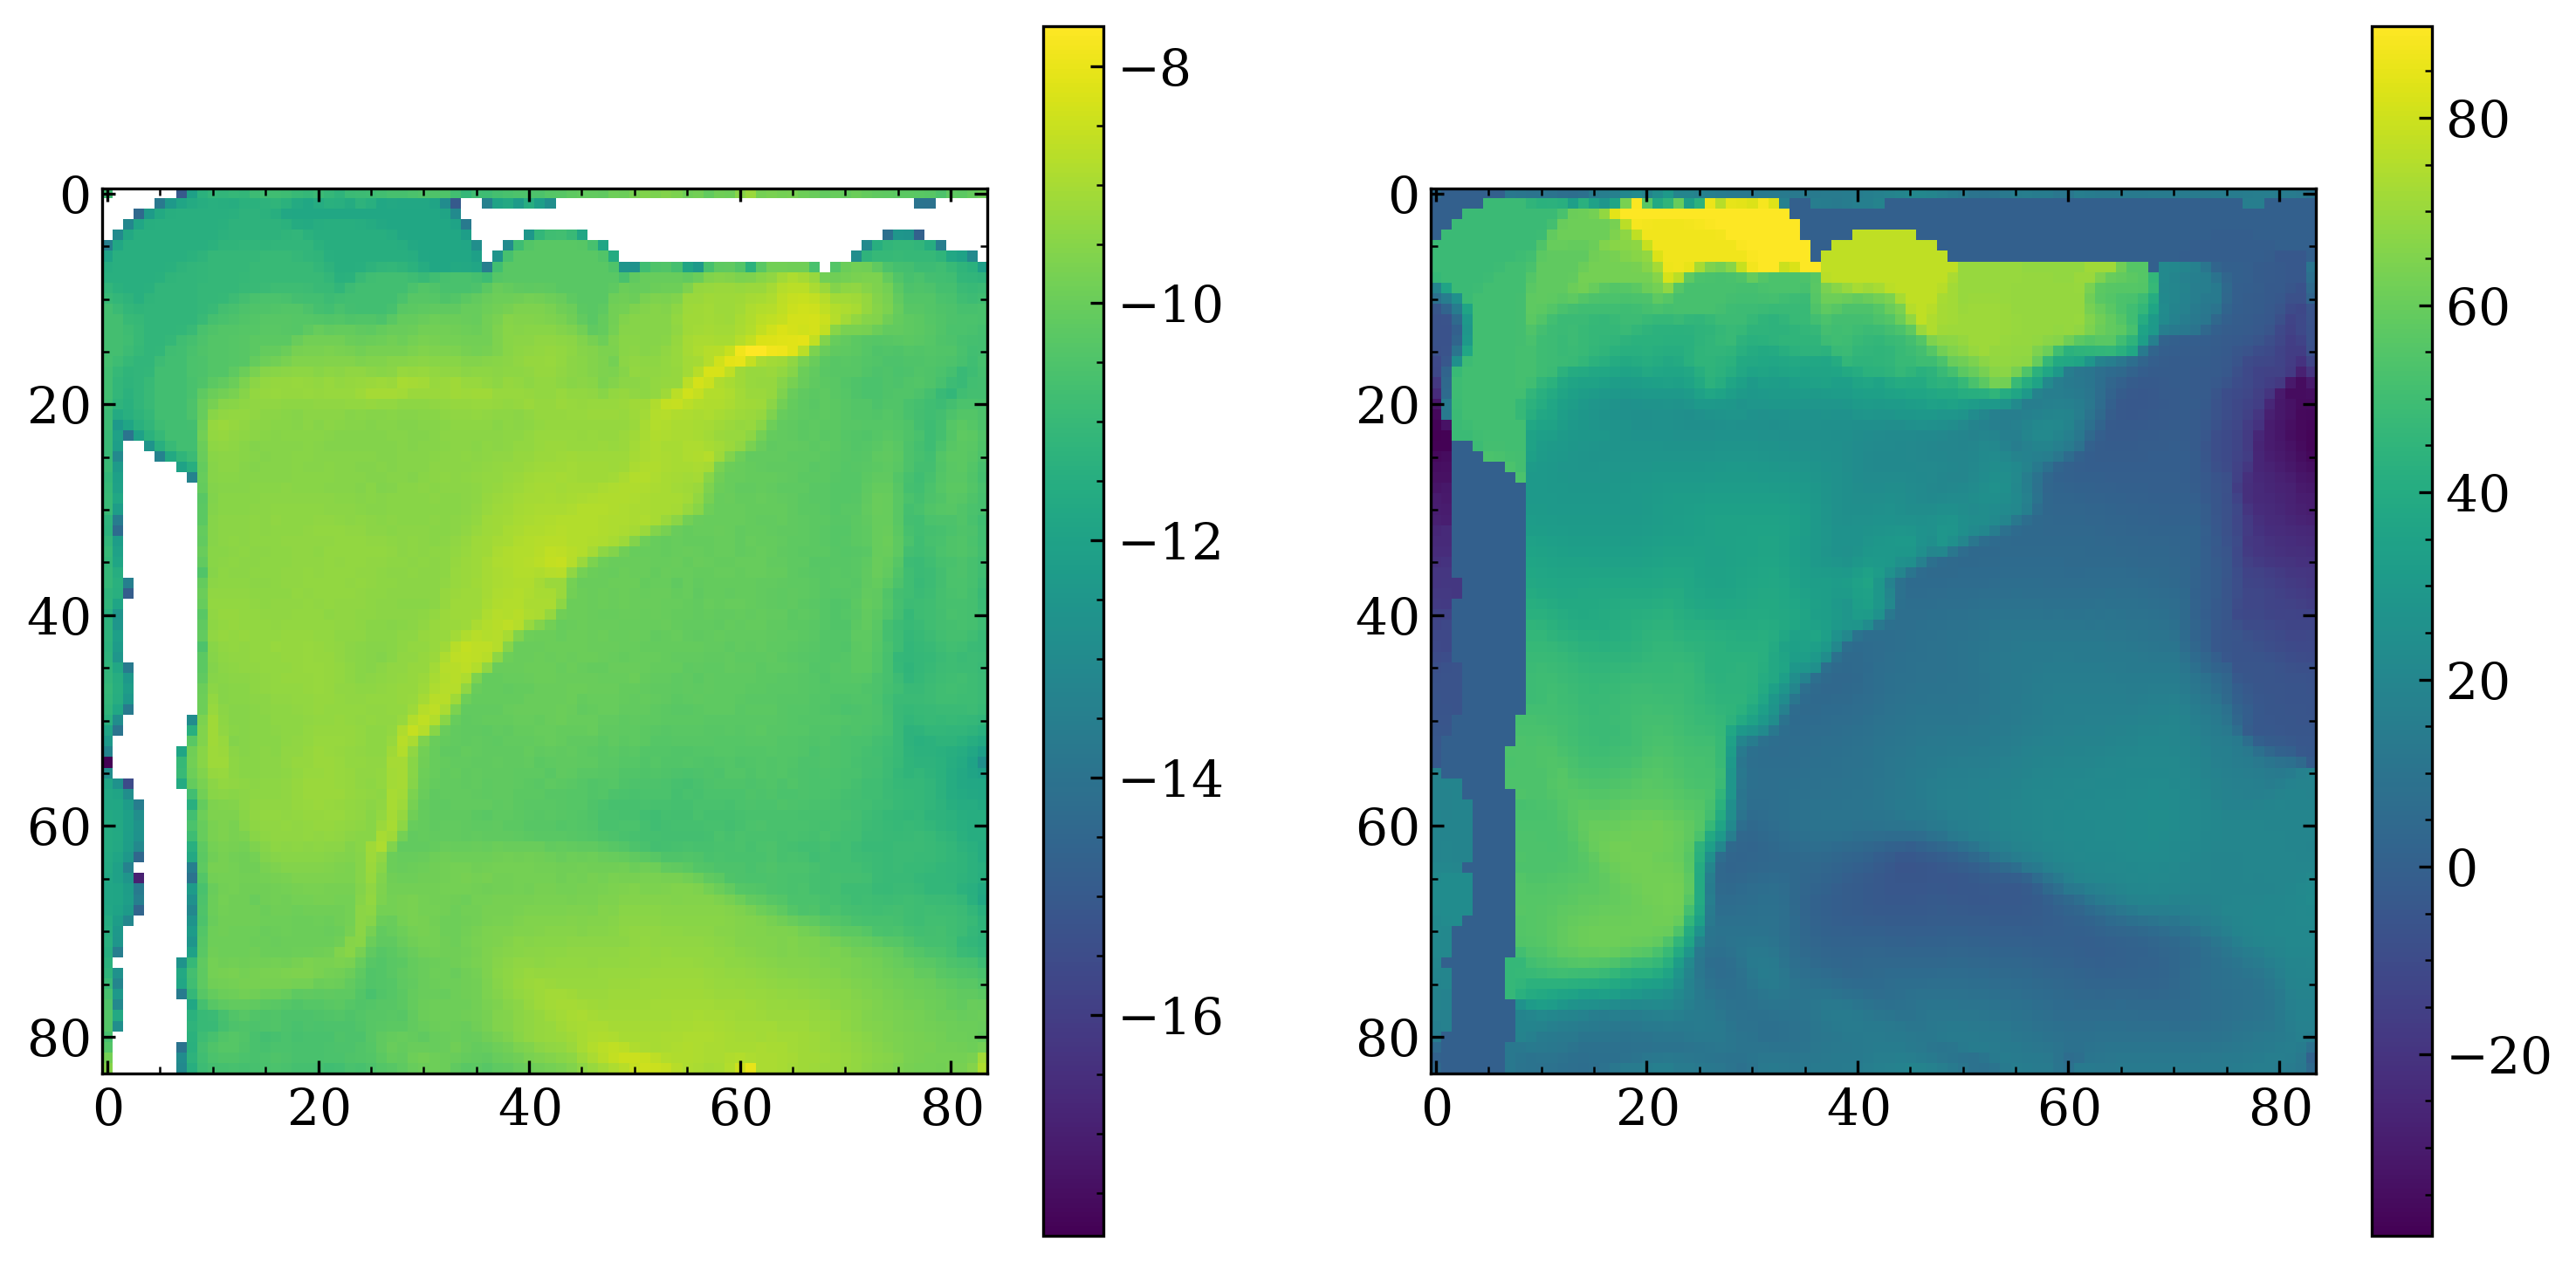

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig1 = axes[0].imshow(np.log10(m_grid[:,:,40]))
plt.colorbar(fig1, ax=axes[0])
fig2 = axes[1].imshow(v_grid[:,:,40,0]) #debug
plt.colorbar(fig2, ax=axes[1])
plt.show()